<a href="https://colab.research.google.com/github/prashantpandya000/21_days_prashant_pandya/blob/main/Training_and_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Setup Paths

In [2]:
!git clone "https://github.com/nicknochnack/TFODCourse.git"

Cloning into 'TFODCourse'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 89 (delta 37), reused 74 (delta 22), pack-reused 0
Unpacking objects: 100% (89/89), done.


In [3]:
import os

In [4]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [5]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport1'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [6]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [7]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [8]:
# https://www.tensorflow.org/install/source_windows

In [9]:
if os.name=='nt':
    !pip install wget
    import wget

In [10]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 63344, done.
remote: Counting objects: 100% (339/339), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 63344 (delta 224), reused 329 (delta 215), pack-reused 63005
Receiving objects: 100% (63344/63344), 574.72 MiB | 29.40 MiB/s, done.
Resolving deltas: 100% (44251/44251), done.


In [11]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Processing /content/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 8.6 MB/s 
     |████████████████████████████████| 352 kB 24.0 MB/s 
     |████████████████████████████████| 1.8 MB 49.1 MB/s 
     |████████████████████████████████| 37.1 MB 50 kB/s 
     |████████████████████████████████| 636 kB 50.3 MB/s 
     |████████████████████████████████| 1

In [12]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
apache-beam                   2.32.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
avro-python3                  1.9.2.1
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca   

In [13]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-09-28 09:14:43.257269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 09:14:43.717917: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 09:14:43.718824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-09-28 09:14:43.737318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 --upgrade

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [ ]:
!pip install Pillow

In [ ]:
!pip install pyyaml

In [ ]:
!pip list

In [14]:
import object_detection

In [15]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-09-28 09:15:29--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.197.128, 2607:f8b0:4001:c1b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.197.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.08s   

2021-09-28 09:15:29 (246 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu

# 2. Create Label Map

In [16]:
labels = [{'name':'fuel gauge', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [17]:
# OPTIONAL IF RUNNING ON COLAB
import os
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [18]:

if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [19]:
!pip install pytz

In [21]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [22]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [23]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [24]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [25]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [26]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [27]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [28]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [96]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [97]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=20000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [98]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=20000


In [ ]:
!{command}

2021-09-28 10:36:47.463642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:36:47.473481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:36:47.474176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:36:47.475555: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:36:47.476343: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# 7. Evaluate the Model

In [58]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [59]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [60]:
!{command}

2021-09-28 10:04:55.144635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:04:55.153664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:04:55.154380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
W0928 10:04:55.158935 139944210896768 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0928 10:04:55.159178 139944210896768 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat

# 8. Load Train Model From Checkpoint

In [39]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [40]:
# Prevent GPU complete consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: 
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

In [41]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

#@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [42]:
!unzip "/content/numberplate detector ssd mobv2 tiny.zip"

unzip:  cannot find or open /content/numberplate detector ssd mobv2 tiny.zip, /content/numberplate detector ssd mobv2 tiny.zip.zip or /content/numberplate detector ssd mobv2 tiny.zip.ZIP.


# 9. Detect from an Image

In [61]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [63]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '/test/image1.png')

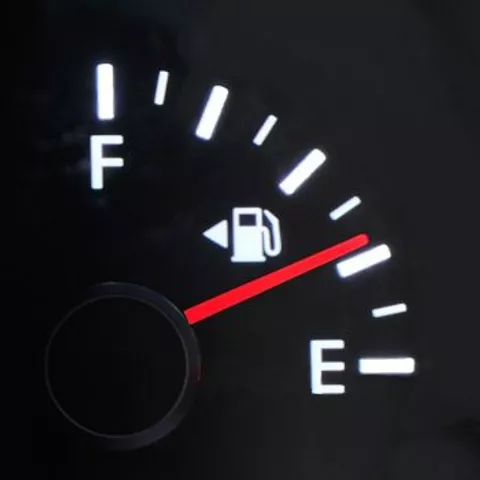

In [64]:
img = cv2.imread("/content/Tensorflow/workspace/images/test/image18.jpg")
from PIL import Image
#img =Image.open("/content/Tensorflow/workspace/images/test/Cars1.png").convert('RGB')
from google.colab.patches import cv2_imshow
cv2_imshow(img)

(191, 264, 3)
(1, 320, 320, 3)
tf.Tensor([[320 320   3]], shape=(1, 3), dtype=int32)


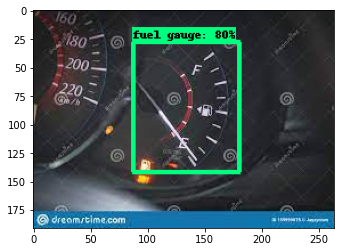

In [81]:
img = cv2.imread("/content/Tensorflow/workspace/images/test/image44.jpg")
print(np.shape(img))
image_np = np.array(img)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

image, shapes = detection_model.preprocess(input_tensor)
print(image.shape)
print(shapes)
prediction_dict = detection_model.predict(image, shapes)
detections = detection_model.postprocess(prediction_dict, shapes)

##detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [50]:
detection_model.to_json()

AttributeError: ignored

In [51]:
print(tf.__version__)

2.6.0


In [52]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

# 10. Freezing the Graph

In [82]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [83]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [84]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [85]:
!{command}

2021-09-28 10:10:43.721032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:10:43.730767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:10:43.731629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:10:43.741147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:10:43.741902: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [86]:
with open('/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/tf_utils.py') as f:
    tf_utils = f.read()

with open('/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/tf_utils.py', 'w') as f:
  # Set labelmap path
  throw_statement = "raise TypeError('Expected Operation, Variable, or Tensor, got ' + str(x))"
  tf_utils = tf_utils.replace("if not isinstance(x, str):" + throw_statement,throw_statement )
  f.write(tf_utils)

In [87]:
output_directory = 'inference_graph'

!python "/content/Tensorflow/models/research/object_detection/exporter_main_v2.py" \
    --trained_checkpoint_dir {"/content/Tensorflow/workspace/models/my_ssd_mobnet"} \
    --output_directory {output_directory} \
    --pipeline_config_path {"/content/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config"}

2021-09-28 10:12:01.520530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:12:01.529784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:12:01.530540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:12:01.539405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 10:12:01.540159: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [88]:
category_index = label_map_util.create_category_index_from_labelmap("/content/Tensorflow/workspace/annotations/label_map.pbtxt", use_display_name=True)
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/{output_directory}/saved_model')

#model = tf.saved_model.load(f'/content/Tensorflow/workspace/images/models/my_ssd_mobnet/saved_model')

In [89]:
model.to_json()

AttributeError: ignored

In [90]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py


--2021-09-28 10:13:46--  https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: ‘inferenceutils.py’

inferenceutils.py   100%[===================>]   2.17K  --.-KB/s    in 0s      

2021-09-28 10:13:46 (33.9 MB/s) - ‘inferenceutils.py’ saved [2219/2219]



['image39.xml', 'image79.jpg', 'image3.jpg', 'image82.xml', 'image51.jpg', 'image37.jpg', 'image24.xml', 'image66.xml', 'image67.xml', 'image63.xml', 'image52.jpg', 'image62.xml', 'image4.jpg', 'image75.jpg', 'image5.jpg', 'image65.xml', 'image28.jpg', 'image78.jpg', 'image41.xml', 'image13.xml', 'image1.xml', 'image64.jpg', 'image45.jpg', 'image79.xml', 'image61.xml', 'image68.jpg', 'image74.jpg', 'image19.jpg', 'image59.jpg', 'image42.jpg', 'image19.xml', 'image26.jpg', 'image54.xml', 'image28.xml', 'image35.xml', 'image61.jpg', 'image57.xml', 'image40.jpg', 'image39.jpg', 'image43.jpg', 'image58.jpg', 'image47.jpg', 'image75.xml', 'image67.jpg', 'image6.xml', 'image70.xml', 'image31.jpg', 'image12.jpg', 'image8.xml', 'image27.xml', 'image38.xml', 'image25.jpg', 'image69.jpg', 'image47.xml', 'image48.xml', 'image36.xml', 'image72.xml', 'image30.jpg', 'image80.jpg', 'image2.jpg', 'image42.xml', 'image55.jpg', 'image66.jpg', 'image31.xml', 'image40.xml', 'image78.xml', 'image59.xml', '

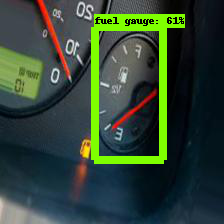

error
0.89669484


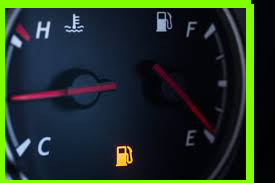

0.6210132


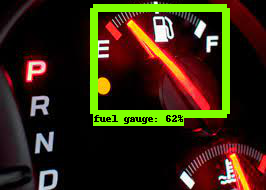

error
error
error
error
0.088828884


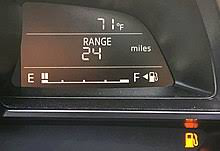

error
0.8286601


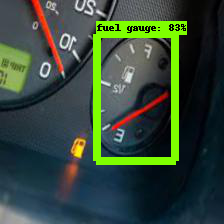

0.74514604


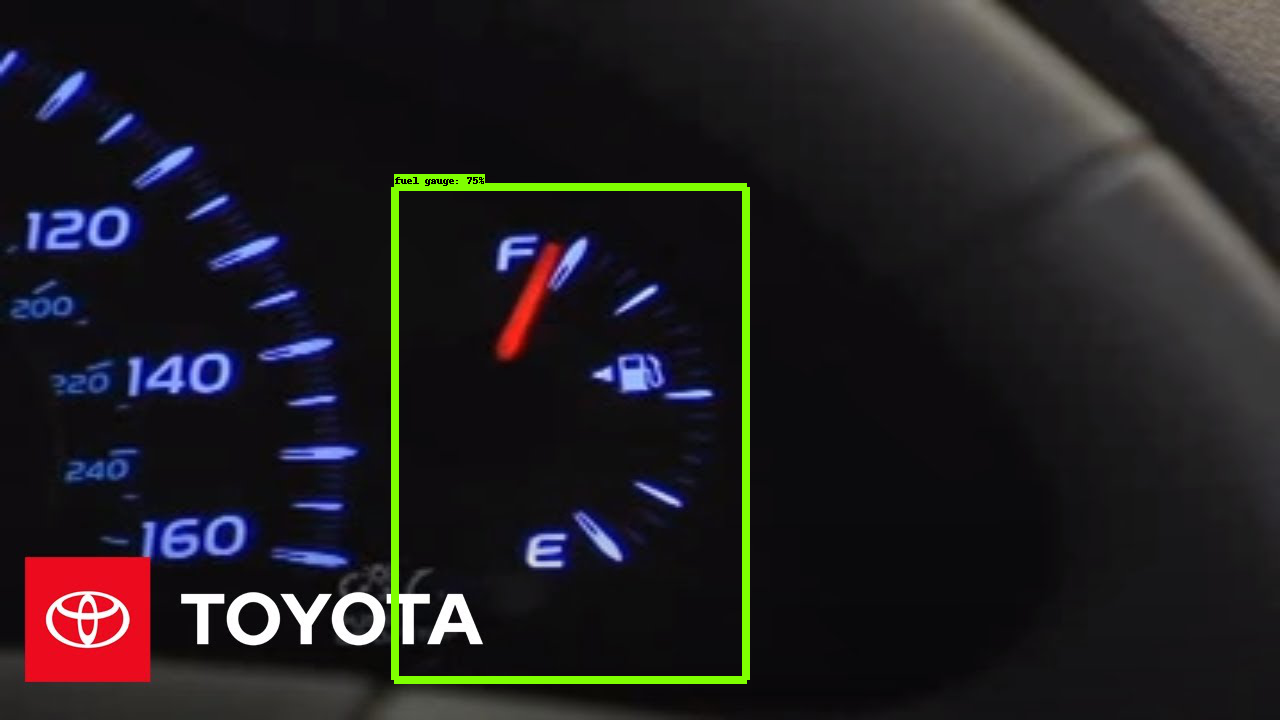

0.9138284


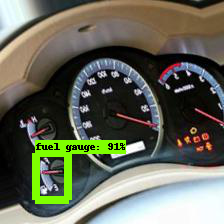

error
0.9901764


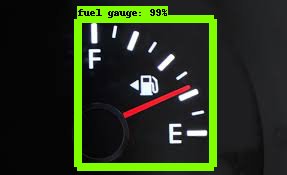

error
error
error
error
0.97557575


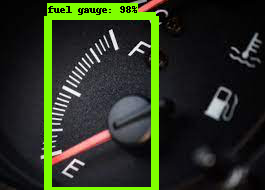

0.96261984


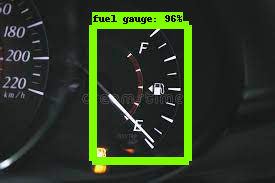

error
error
0.99228257


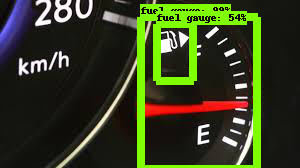

0.8566582


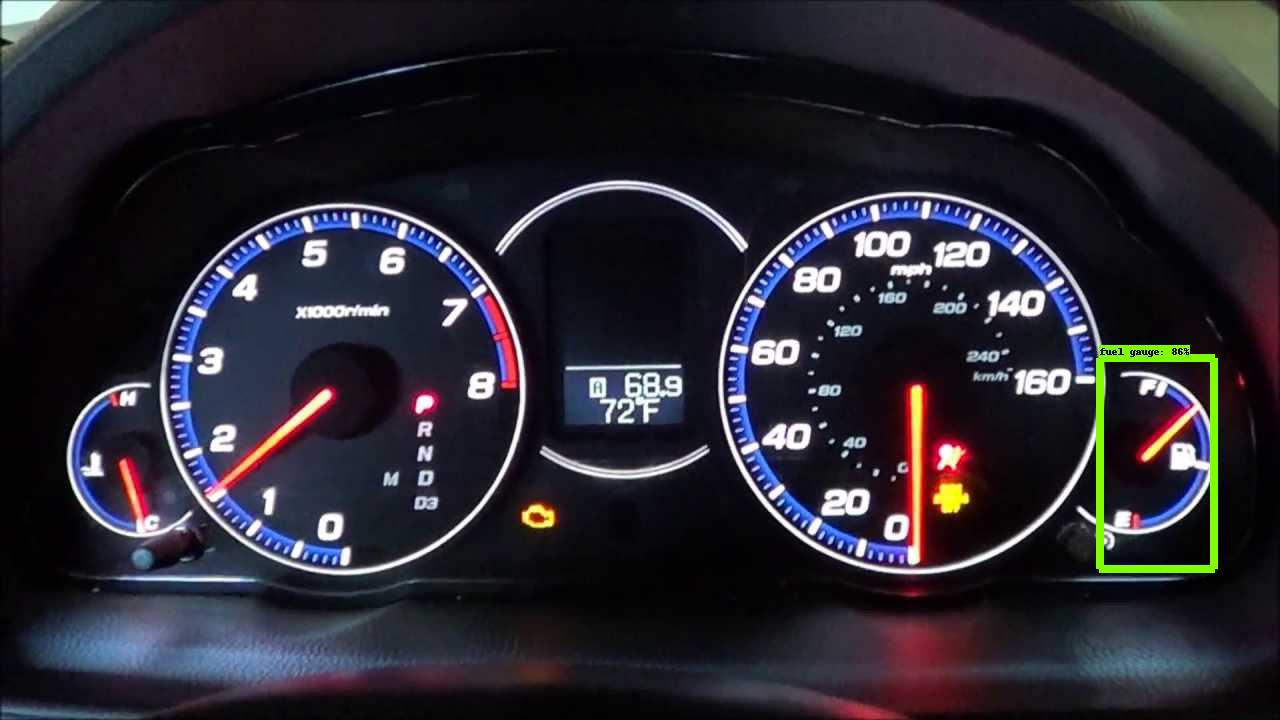

0.9679795


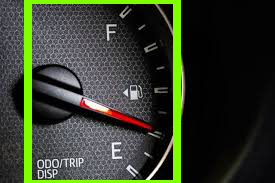

0.4967093


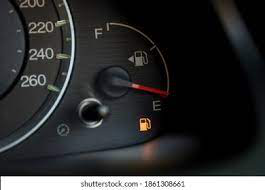

0.98524845


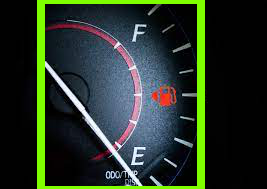

error
0.9800995


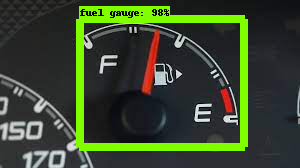

error
error
error
0.9865956


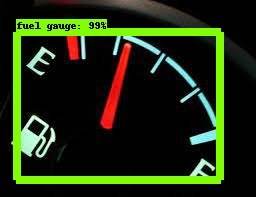

error
0.9901764


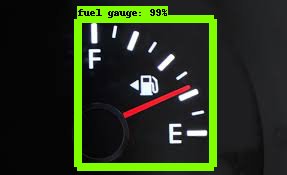

0.94339097


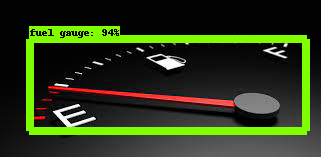

0.7920932


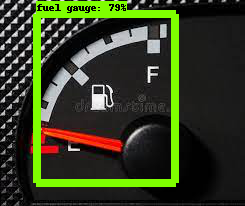

0.9377088


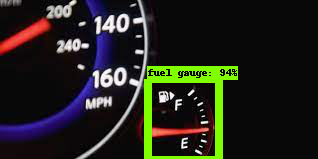

0.99145985


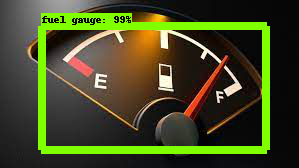

error
0.9619491


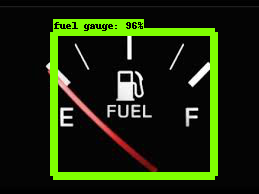

error
error
0.9858736


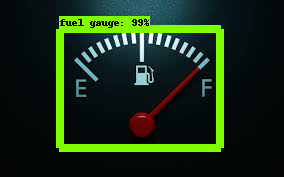

0.36195654


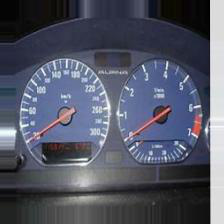

error
error
error
0.98545456


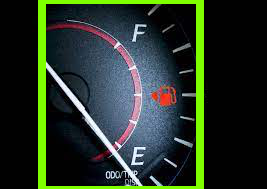

0.95648587


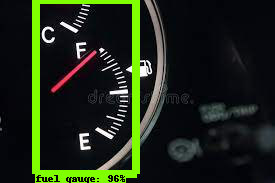

error
error
error
error
0.4231637


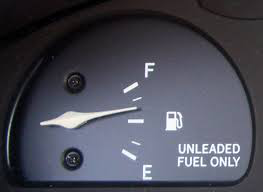

error
0.48982203


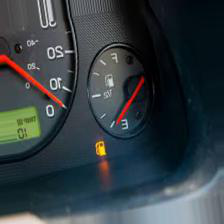

error
0.8574399


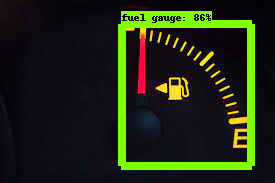

0.9367714


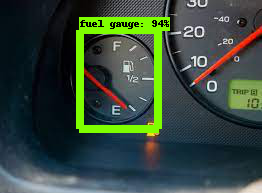

error
error
error
error
error
0.97663534


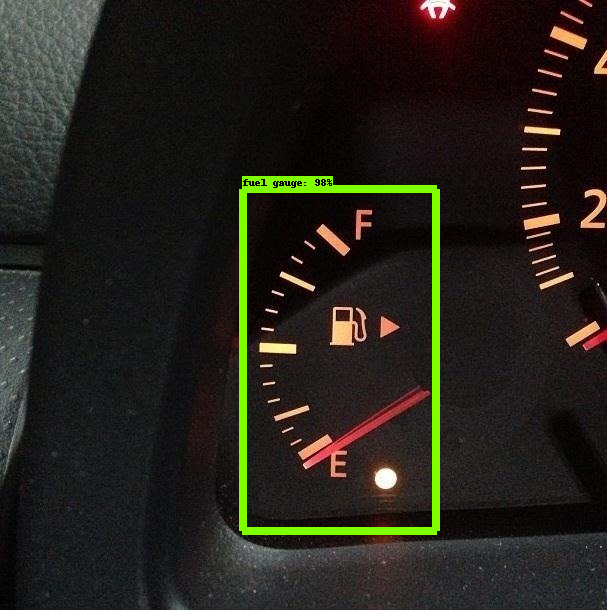

error
error
error
error
0.4799634


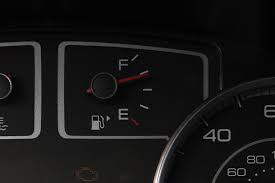

error
error
error
0.5004139


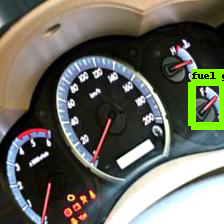

error
0.92634314


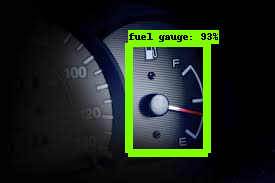

error
error
0.30540672


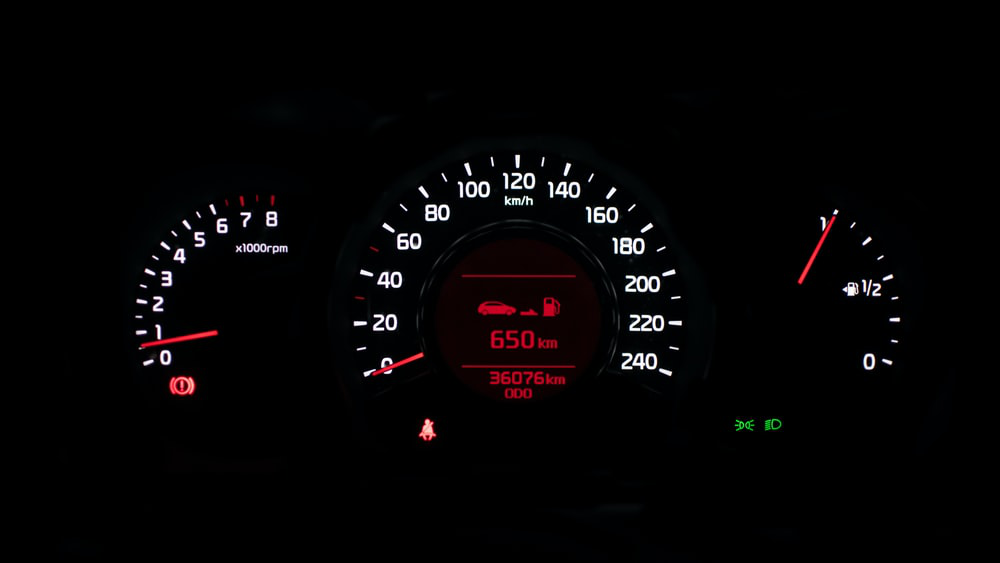

error
error
error
0.587546


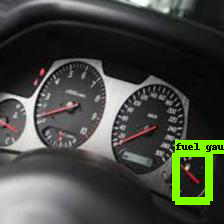

error
0.9627721


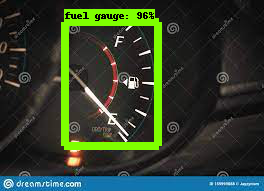

error
0.9961055


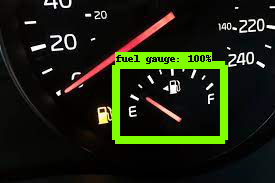

0.8899272


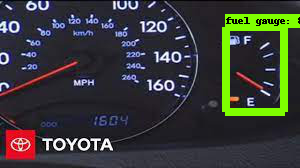

0.8565523


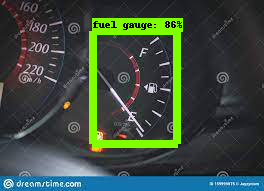

0.99316484


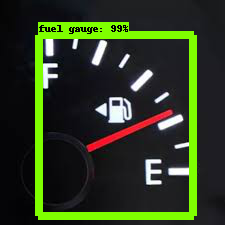

error
0.249267


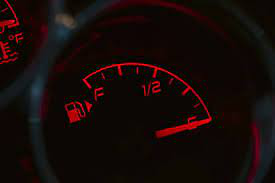

error
error
error
0.10852372


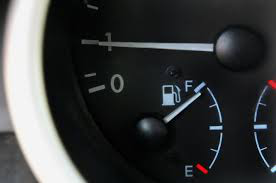

error
0.8921694


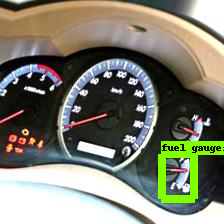

0.5324435


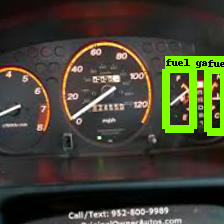

error
error
error
error
0.5847581


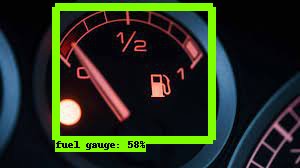

error
0.99076897


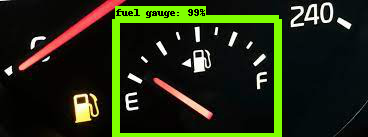

error
error
0.9884801


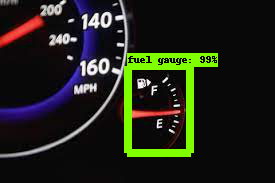

0.12532759


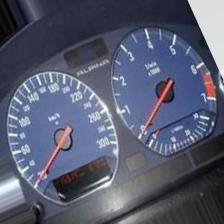

error
0.98091394


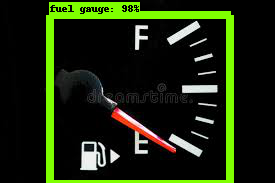

0.32587045


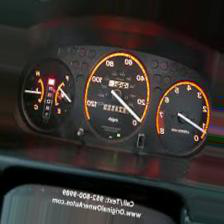

error
error
0.39371905


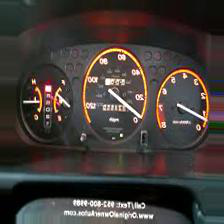

0.55990034


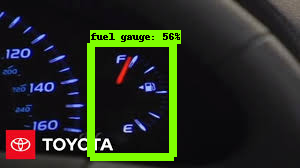

0.75402206


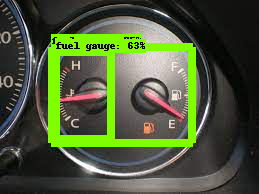

0.9679662


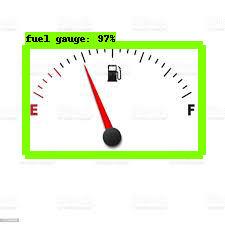

error
0.99356246


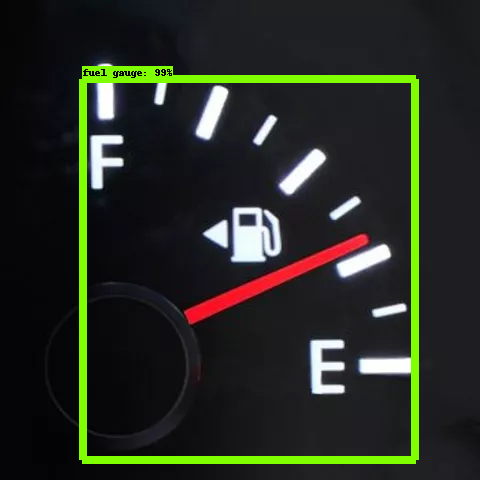

0.20114896


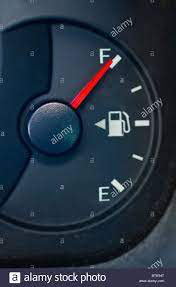

0.05231581


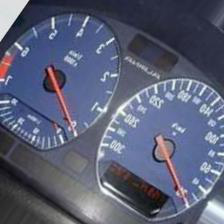

0.9979646


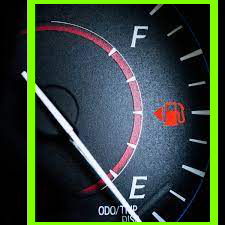

0.79752886


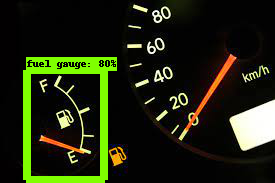

error
0.98494095


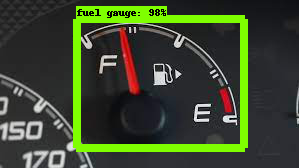

error
error
0.9700066


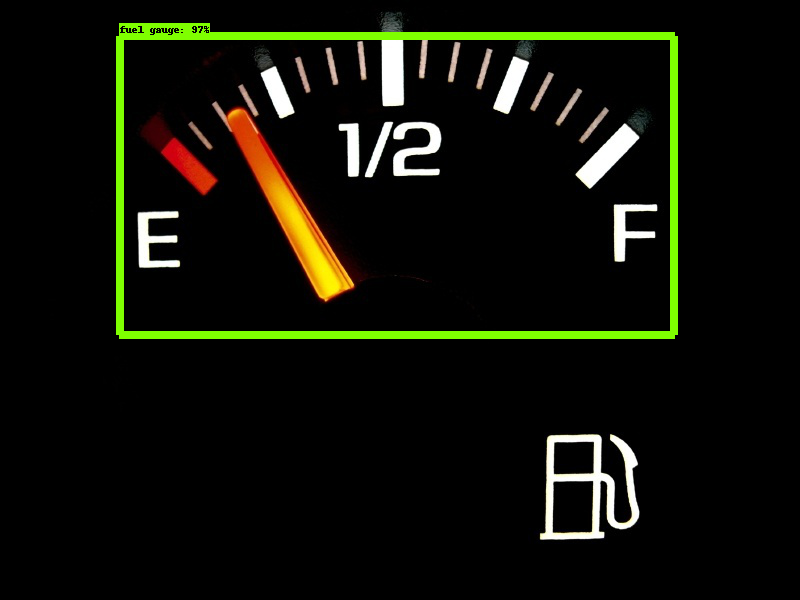

0.99421316


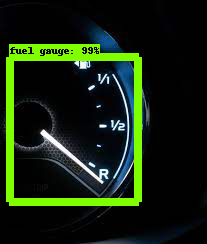

error
0.5986993


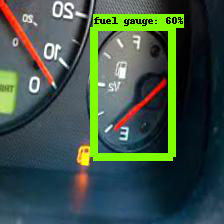

error
0.99421316


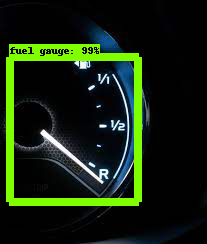

error
error
error
0.91819024


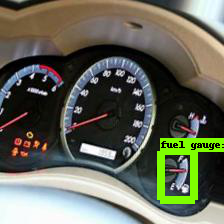

0.9652914


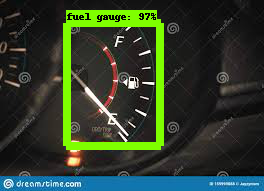

0.9278873


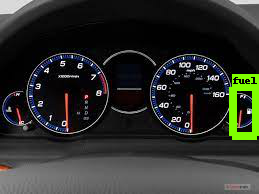

error
0.7511768


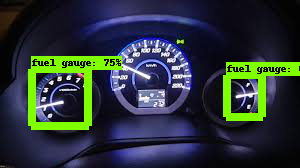

0.88201165


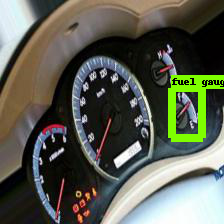

0.8564279


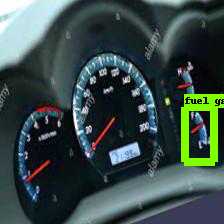

0.9385876


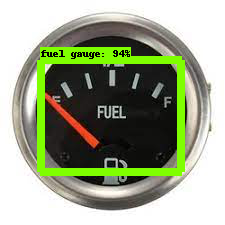

0.9150763


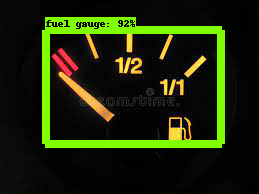

0.99316484


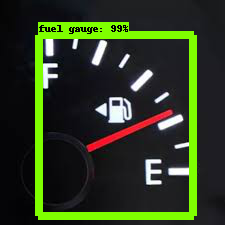

0.0738158


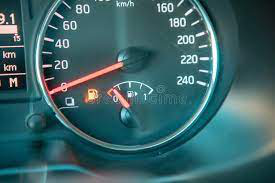

error
error
0.9723041


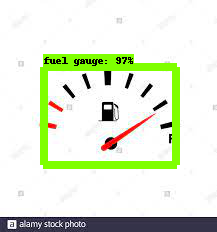

In [91]:
#!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
# No Rotation
from inferenceutils import *
from scipy.ndimage import rotate
images = os.listdir("/content/Tensorflow/workspace/images/test")
print(images)
for image_name in images:
  try:
    image_np = load_image_into_numpy_array("/content/Tensorflow/workspace/images/test/"+image_name)
    #angle = np.random.randint(low = 170,high = 180)
    #print(angle)
    image_np = rotate(image_np,0)
    output_dict = run_inference_for_single_image(model, image_np)
    print(output_dict['detection_scores'][0])
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks_reframed', None),
        use_normalized_coordinates=True,
        line_thickness=8)
    display(Image.fromarray(image_np))
  except:
      print("error")
      pass

# 12. Conversion to TFLite

In [72]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [73]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [74]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport
python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport


In [75]:
!{command}

2021-09-28 09:01:52.106664: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-28 09:01:52.106717: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d0582ee6282f): /proc/driver/nvidia/version does not exist
W0928 09:02:03.183896 140250210862976 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f8e1aec7810>, because it is not built.
W0928 09:02:03.456731 140250210862976 save_impl.py:72] Skipping full serialization of Keras layer <keras.layers.convolutional.SeparableConv2D object at 0x7f8e1addef10>, because it is not built.
W0928 09:02:03.456984 140250210862976 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7f8e1a3a8610>, because it is not built.
W0928 09:02:03.

In [76]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [71]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [ ]:
!{command}

2021-09-24 06:36:43.894289: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-24 06:36:46.495431: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-24 06:36:46.496314: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-24 06:36:46.501767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 06:36:46.502549: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-09-24 06:36:46.502602: I tensorflow/stream_executor/platform/default/dso_lo

# 13. Zip and Export Models 

In [92]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [93]:
!zip -r "fuel detector ssd mobv2_320.zip" "/content/Tensorflow/workspace/models/my_ssd_mobnet/"

  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/ (stored 0%)
  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/ckpt-9.data-00000-of-00001 (deflated 7%)
  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/ckpt-7.data-00000-of-00001 (deflated 7%)
  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/ckpt-11.data-00000-of-00001 (deflated 7%)
  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/eval/ (stored 0%)
  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/eval/events.out.tfevents.1632821930.2001aabcf5da.728.0.v2 (deflated 1%)
  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/eval/events.out.tfevents.1632823504.2001aabcf5da.1031.0.v2 (deflated 1%)
  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config (deflated 69%)
  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/train/ (stored 0%)
  adding: content/Tensorflow/workspace/models/my_ssd_mobnet/train/events.out.tfevents.1632822465.2001aabcf5da.

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
